In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import time
import scipy.integrate as integrate

In [57]:
wv=1  # Frequency associated to the variation of the magnetic field 

T=2*np.pi/wv; # Magnetic field period

wR=0.5

Ne=10;
e0=0.01;
ef=0.2;

elist=np.linspace(e0,ef,Ne);  # Larmor frequency 

args = {'wv': wv}


nT=100;

tlist= np.linspace(0, T, nT);

qe1=np.zeros(len(elist)) # Empty vector to save quasienergies for each value of wR

qe2=np.zeros(len(elist)) # Empty vector to save quasienergies for each value of wR

fD1=np.zeros(len(elist));

fD2=np.zeros(len(elist));

fG1=np.zeros(len(elist));

fG2=np.zeros(len(elist));

b = Bloch();

def fx(t,args):
    return np.cos(args["wv"]*t)

def fy(t,args):
    return np.sin(args["wv"]*t)



for n, e in enumerate(elist): # Iterative process to obtain quasienergies
    
    p,pe= integrate.quad(lambda t: np.sqrt(1-(e*np.cos(t))**2),0,2*np.pi)
    Hx =  1/2*wR*p*np.sqrt(1-e**2)*sigmax()
    Hy = 1/2*wR*p*sigmay()
    H = [[Hx, fx], [Hy, fy]];
    
    f_modes_0, f_energies = floquet_modes(H, T, args)
    qe1[n]=f_energies[0]
    qe2[n]=f_energies[1]
    
    f_modes_table_t = floquet_modes_table(f_modes_0, f_energies, 
                                          tlist, H, T, args); # Calculate floquet states in all tlists
    e1=np.zeros(len(tlist))
    
    e2=np.zeros(len(tlist))
       
    nx1 = np.zeros(len(tlist))
    ny1 = np.zeros(len(tlist))
    nz1 = np.zeros(len(tlist))
    
    nx2 = np.zeros(len(tlist))
    ny2 = np.zeros(len(tlist))
    nz2 = np.zeros(len(tlist))
    
       
    for i, t in enumerate(tlist):
    
        psi_t_1,psi_t_2 = floquet_modes_t_lookup(f_modes_table_t, t, T) # 
        Hd=Hx*fx(t,args)+Hy*fy(t,args)
        e1[i] = expect(Hd, psi_t_1)
        e2[i] = expect(Hd, psi_t_2)
        
        fDN1=-T/nT*np.sum(e1)
        fDN2=-T/nT*np.sum(e2)
        
        nx1[i] = expect(sigmax(), psi_t_1)
        ny1[i] = expect(sigmay(), psi_t_1)
        nz1[i] = expect(sigmaz(), psi_t_1)
    
        nx2[i] = expect(sigmax(), psi_t_2)
        ny2[i] = expect(sigmay(), psi_t_2)
        nz2[i] = expect(sigmaz(), psi_t_2)
        
    PN1=[nx1,ny1,nz1]
    PN2=[nx2,ny2,nz2]
    
    b.add_points(PN1,'l')
    b.add_points(PN2,'l')

    fD1[n]=fDN1
    fD2[n]=fDN2
    
    fG1[n]=f_energies[0]-fDN1
    fG2[n]=f_energies[1]-fDN2
    

Text(0.5, 0, '$\\epsilon$')

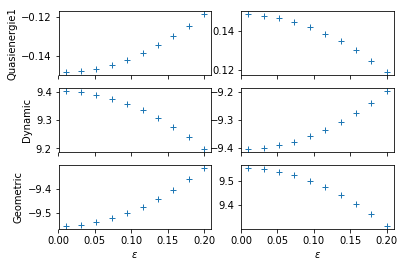

In [58]:
fig, ((ax1, ax2),( ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, sharex=True)

ax1.plot(elist,qe1,'+')
ax1.set_ylabel('Quasienergie1')


ax2.plot(elist,qe2,'+')

ax3.plot(elist,fD1,'+')
ax3.set_ylabel('Dynamic')

ax4.plot(elist,fD2,'+')

ax5.plot(elist,fG1,'+')
ax5.set_xlabel('$\epsilon$')
ax5.set_ylabel('Geometric')

ax6.plot(elist,fG2,'+')
ax6.set_xlabel('$\epsilon$')



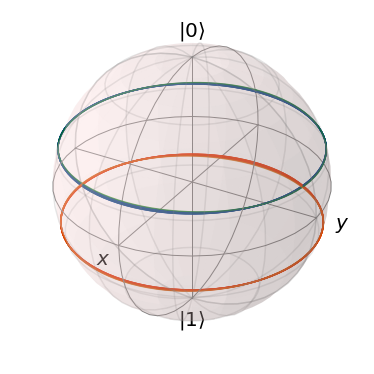

In [59]:
b.make_sphere()